You can check the notebook at the given link as well: [link text](https://colab.research.google.com/drive/1t6i0Ro4nyd_wMVphVJLw23Prk3tUnwAj?usp=sharing)

Change the runtime type from CPU to GPU so that it takes the GPU to run and have the execution results very fastly

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Download Dataset

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 37.0MB/s]
100% 1.06G/1.06G [00:27<00:00, 42.1MB/s]


Unzip the file

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

Creating Generators to Train dataset

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


Creating Generators to Validate dataset

In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


Normalize Dataset so that our values can come in the form of 0 & 1

In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Creating CNN Model Architecture having 3 layers

1. 32 Filters
2. 64 Filters
3. 128 Filters



In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

Compiling the model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Saving the results in history so that we can plot graph in future

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 113ms/step - loss: 1.1895 - accuracy: 0.6087 - val_loss: 0.6171 - val_accuracy: 0.6690
Epoch 2/10
625/625 [==============================] - 71s 112ms/step - loss: 0.5378 - accuracy: 0.7280 - val_loss: 0.5779 - val_accuracy: 0.6754
Epoch 3/10
625/625 [==============================] - 71s 112ms/step - loss: 0.4562 - accuracy: 0.7879 - val_loss: 0.4884 - val_accuracy: 0.7586
Epoch 4/10
625/625 [==============================] - 78s 124ms/step - loss: 0.4018 - accuracy: 0.8172 - val_loss: 0.4210 - val_accuracy: 0.8016
Epoch 5/10
625/625 [==============================] - 69s 111ms/step - loss: 0.3244 - accuracy: 0.8583 - val_loss: 0.5349 - val_accuracy: 0.7442
Epoch 6/10
625/625 [==============================] - 71s 114ms/step - loss: 0.2487 - accuracy: 0.8983 - val_loss: 0.5752 - val_accuracy: 0.7734
Epoch 7/10
625/625 [==============================] - 69s 111ms/step - loss: 0.1680 - accuracy: 0.9359 - val_loss: 0.6595 - val_ac

To see training result we will see it with the help of graph

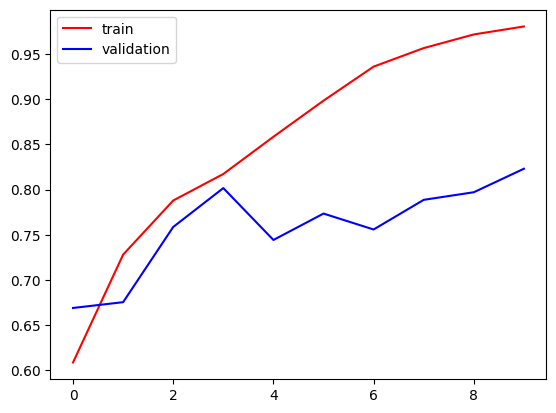

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

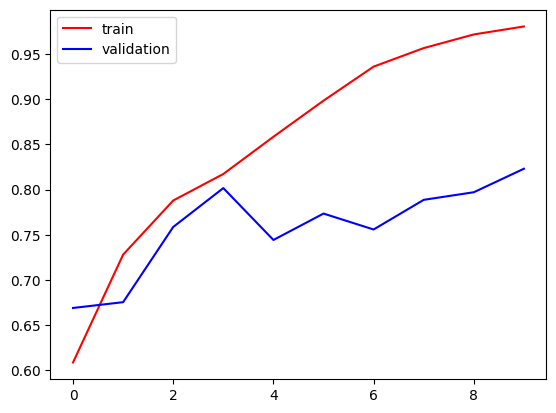

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

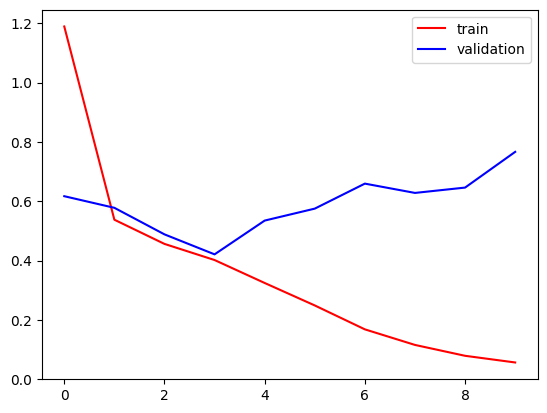

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

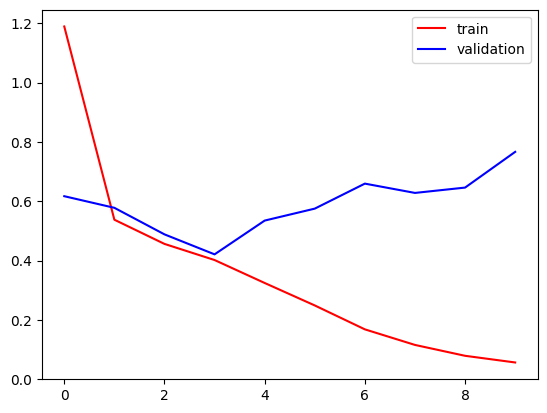

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

cv means Capturing video
The 'import cv2' statement brings the OpenCV library into the Python script, allowing access to its functions for computer vision and image processing.

**here the predictive model will tell us where the image is of dog or cad. Here,**


1. **Dog is assigned with 1**
2. **Cat is assigned with 0**



In [ ]:
import cv2

**Checking the data set for my dog "Snow" now**

In [ ]:
test_img = cv2.imread('/content/Snow.jpg')

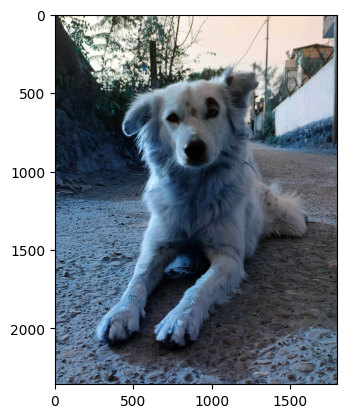

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(2357, 1800, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 371ms/step


array([[1.]], dtype=float32)

**Since, the dataset answer is 1 it say the picture is of dog**

**Now, Checking the data set for my Cat "Billu" now**

In [ ]:
test_img = cv2.imread('/content/Billu.jpg')

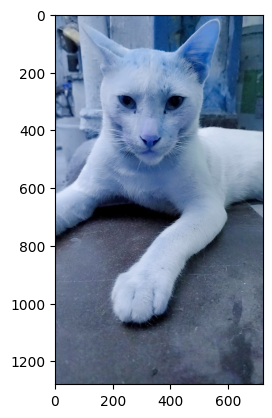

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1280, 720, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 138ms/step


array([[0.]], dtype=float32)

**Since, the dataset answer is 0 it say the picture is of cat**

Import Libraries

In [ ]:
import cv2
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

Creating CNN Model Architecture with reduced complexity

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Saving the results in history

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 113ms/step - loss: 2.1649 - accuracy: 0.5174 - val_loss: 0.6917 - val_accuracy: 0.5322
Epoch 2/10
625/625 [==============================] - 81s 130ms/step - loss: 0.7176 - accuracy: 0.5232 - val_loss: 0.6736 - val_accuracy: 0.5872
Epoch 3/10
625/625 [==============================] - 72s 114ms/step - loss: 0.6777 - accuracy: 0.5691 - val_loss: 0.6765 - val_accuracy: 0.5834
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.6528 - accuracy: 0.6129 - val_loss: 0.6274 - val_accuracy: 0.6284
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6158 - accuracy: 0.6618 - val_loss: 0.6058 - val_accuracy: 0.6562
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5687 - accuracy: 0.7132 - val_loss: 0.5199 - val_accuracy: 0.7420
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5098 - accuracy: 0.7606 - val_loss: 0.7956 - val_ac

Plotting the results

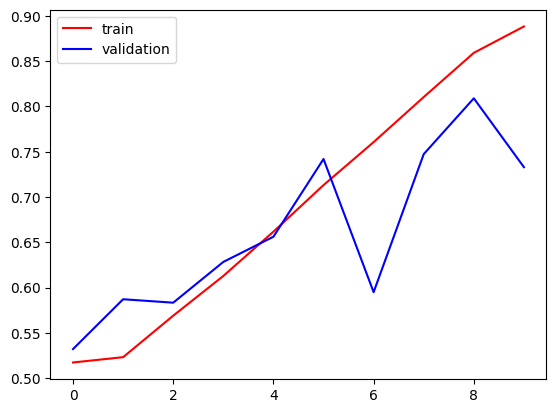

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

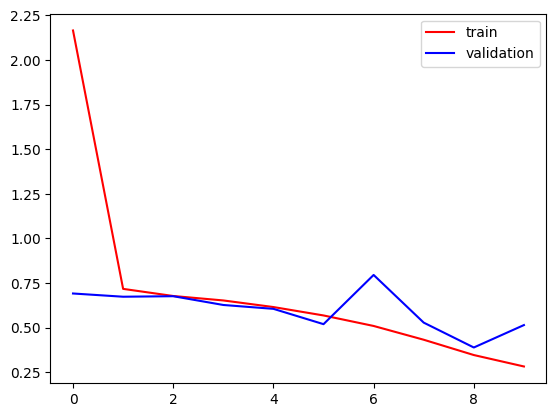

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

Now we can see that the distance between train and validation lines is very less so Reduce complexity can be one of the best model to classify.

**Checking the data set for my dog "Snow" again**

---



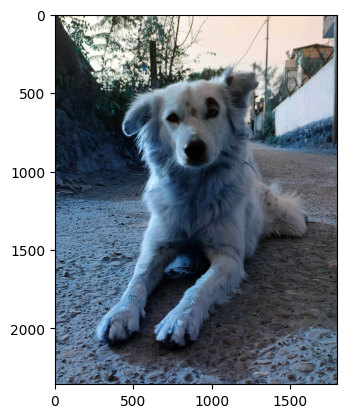

In [ ]:
test_img_dog = cv2.imread('/content/Snow.jpg')
plt.imshow(test_img_dog)

In [ ]:
test_img.shape

(2357, 1800, 3)

In [ ]:
test_img_dog = cv2.resize(test_img_dog, (256, 256))
test_input_dog = test_img_dog.reshape((1, 256, 256, 3))
prediction_dog = model.predict(test_input_dog)

1/1 [==============================] - 0s 19ms/step


Apply a threshold (e.g., 0.5) to get a binary prediction

In [ ]:
binary_prediction_dog = 1 if prediction_dog > 0.5 else 0

In [ ]:
print("Dog Prediction:", binary_prediction_dog)

Dog Prediction: 1


**Since, the dataset answer is 1 it say the picture is of dog**

**Now, Checking the data set for my Cat "Billu" now**

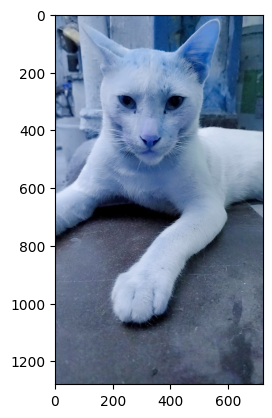

In [ ]:
test_img_cat = cv2.imread('/content/Billu.jpg')
plt.imshow(test_img_cat)

In [ ]:
test_img.shape

(1280, 720, 3)

In [ ]:
test_img_cat = cv2.resize(test_img_cat, (256, 256))
test_input_cat = test_img_cat.reshape((1, 256, 256, 3))
prediction_cat = model.predict(test_input_cat)

1/1 [==============================] - 0s 29ms/step


Apply a threshold (e.g., 0.5) to get a binary prediction

In [ ]:
binary_prediction_cat = 0 if prediction_cat > 0.5 else 0

In [ ]:
print("Cat Prediction:", binary_prediction_cat)

Cat Prediction: 0


**Since, the dataset answer is 0 it say the picture is of cat**